## import liblary

In [1]:
import re
import string
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

## read

In [2]:
jan_2024 = pd.read_csv('Serambi_1-2024.csv')
des_2023 = pd.read_csv('Serambi_12-2023.csv')
nov_2023 = pd.read_csv('Serambi_11-2023.csv')
okt_2023 = pd.read_csv('Serambi_10-2023.csv')
sep_2023 = pd.read_csv('Serambi_9-2023.csv')
agus_2023 = pd.read_csv('Serambi_8-2023.csv')

## concat data

In [3]:
berita_triwulan = pd.concat([agus_2023, sep_2023, okt_2023, nov_2023, des_2023, jan_2024], ignore_index=True)

## jumlah label unique

In [4]:
berita_triwulan.label.nunique()

1014

In [5]:
berita_triwulan.label.unique().tolist()

['Prakiraan Cuaca',
 'Berita Banda Aceh',
 'Berita Pidie',
 'Berita Aceh Utara',
 nan,
 'Berita Nagan Raya',
 'Berita Sabang',
 'Berita Aceh Timur',
 'Berita Kutaraja',
 'Info Cuaca di Aceh',
 'Berita Bireuen',
 'Berita Aceh Barat',
 'Berita Aceh Singkil',
 'Harga Emas',
 'Berita Aceh Jaya',
 'Pemilu 2024',
 'Berita Abdya',
 'Berita Aceh Besar',
 'Inflasi',
 'Berita Simeulue',
 'Harga Emas di Aceh',
 'Berita Lhokseumawe',
 'Berita Aceh Tamiang',
 'Berita Pidie Jaya',
 'Berita Langsa',
 'Peluang Kerja',
 'PT PGE',
 'Unimal News',
 'Berita Subulussalam',
 'Info Aceh Timur',
 'Berita Aceh Barat Daya',
 'Sertijab',
 'Stunting',
 'Dunia Kampus',
 'Haba Mifa',
 'Pariwisata',
 'Beirta Gayo Lues',
 'Kebun Plasma',
 'Dana Desa',
 'Berita Aceh Selatan',
 'Info Cabdisdik Aceh Timur',
 'Ramza Harli',
 'Mihrab',
 'Berita Gayo Lues',
 'Haba Unimal',
 'Jalan Santai',
 'Penerbangan',
 'Mahasiswa KKM',
 'Data Statistik',
 'Bantuan Sosial',
 'Berita Kesehatan',
 'Penyelundupan',
 'Dunai Kampus',
 'Ketah

## 35 label teratas

In [6]:
berita_triwulan.label.value_counts().head(1014)

label
Berita Banda Aceh     1530
Berita Bireuen         672
Berita Aceh Utara      618
Berita Lhokseumawe     524
Berita Pidie           514
                      ... 
Sembako                  1
Ormas                    1
Unjuk Rasa               1
Pekerja Migran           1
Kisruh APBA 2024         1
Name: count, Length: 1014, dtype: int64

<Axes: xlabel='label'>

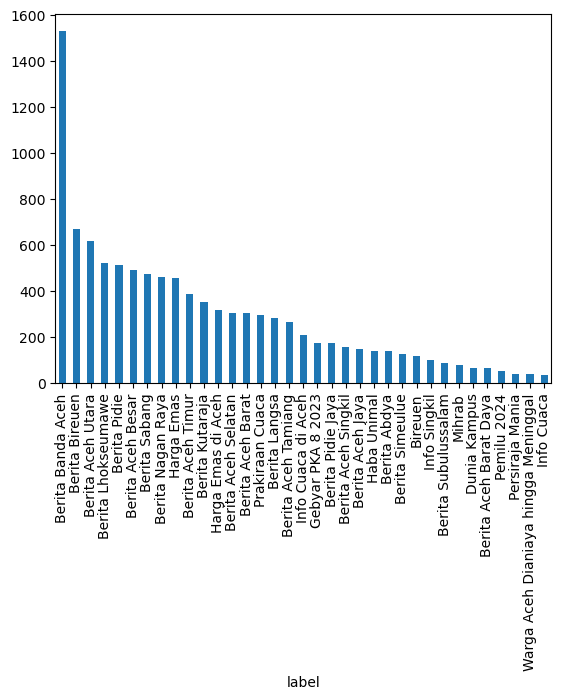

In [7]:
berita_triwulan.label.value_counts().head(35).plot(kind='bar')

## data tidak berlabel

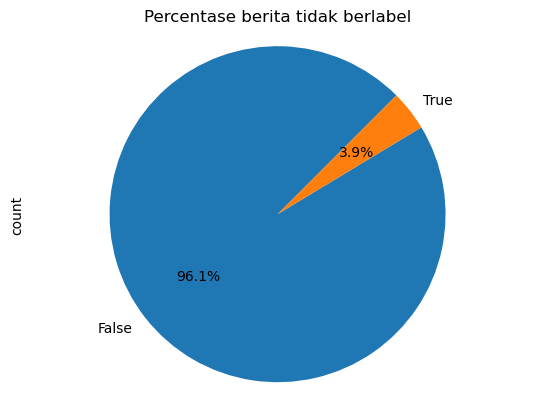

In [8]:
berita_triwulan.label.isnull().value_counts().plot.pie(autopct='%1.1f%%', startangle=45)
plt.title('Percentase berita tidak berlabel')
plt.axis('equal')
plt.show()

In [9]:
berita_triwulan[berita_triwulan.label.isnull()]

,date,headline,link,content,label
4,2023-8-1,Komisioner KIP Aceh Utara Ucap Janji Bekerja J...,https://aceh.tribunnews.com/2023/08/01/komisio...,\nLaporan Jafaruddin I Aceh Utara \nSERAMBINEW...,NaN
73,2023-8-2,"Hadiri HUT Ke-40, Pj Bupati Abes Harap Semen A...",https://aceh.tribunnews.com/2023/08/02/hadiri-...,\nLaporan Indra Wijaya | Aceh Besar\nSERAMBINE...,NaN
102,2023-8-2,110 Unit Rumah Program Penanganan Kemiskinan E...,https://aceh.tribunnews.com/2023/08/02/110-uni...,\nLaporan Yusmandin Idris I Bireuen\nSERAMBINE...,NaN
115,2023-8-2,"Pelayanan Faskes BPJS Kurang Memuaskan, Pasien...",https://aceh.tribunnews.com/2023/08/02/pelayan...,\nLaporan Khalidin I Subulussalam\nSERAMBINEWS...,NaN
220,2023-8-3,Hotel Amel Convention Hall Bekerja Sama dengan...,https://aceh.tribunnews.com/2023/08/03/hotel-a...,\nHOTEL AMEL CONVENTION HALL\nTanda Tangan Ker...,NaN
...,...,...,...,...,...
13460,2024-1-31,"Cek Harga Bahan Pokok di Pasar, Sekda Nagan Ra...",https://aceh.tribunnews.com/2024/01/31/cek-har...,\nLaporan Rizwan I Nagan Raya\nSERAMBINEWS.COM...,NaN
13469,2024-1-31,Prodi S1 Ilmu Keperawatan Universitas Muhammad...,https://aceh.tribunnews.com/2024/01/31/prodi-s...,\nLaporan Jafaruddin I Lhokseumawe \nSERAMBINE...,NaN
13471,2024-1-31,"Lagi, Proyek Rehab Bendung Krueng Pase Dipasti...",https://aceh.tribunnews.com/2024/01/31/lagi-pr...,\nLaporan Jafaruddin I Aceh Utara \nSERAMBINEW...,NaN
13474,2024-1-31,"Fasilitas Pendukung Rampung, Pj Bupati Bireuen...",https://aceh.tribunnews.com/2024/01/31/fasilit...,\nLaporan Yusmandin Idris I Bireuen\nSERAMBINE...,NaN


## flagging

In [10]:
relevant = ['Berita Banda Aceh', 'Berita Pidie', 'Berita Aceh Utara', 'null', 'Berita Nagan Raya', 'Berita Sabang',
            'Berita Aceh Timur','Berita Kutaraja', 'Harga Emas di Aceh', 'Berita Aceh Selatan', 'Berita Aceh Barat',
            'Berita Langsa', 'Berita Aceh Tamiang', 'Berita Pidie Jaya', 'Berita Aceh Singkil', 'Berita Aceh Jaya',
            'Haba Unimal', 'Berita Abdya', 'Berita Simeulue', 'Bireuen', 'Info Singkil', 'Berita Subulussalam',
            'Dunia Kampus', 'Berita Aceh Barat Daya', 'Nagan Raya', 'Haba Mifa', 'Aceh Selatan', 'Aceh Timur',
            'Lhokseumawe', 'Aceh Barat', 'Pojok UMKM', 'Aceh Jaya', 'Bantuan Sosial', 'Pidie Jaya', 'Aceh Besar',
            'Langsa', 'Aceh Tamiang', 'Aceh Barat Daya', 'Aceh Utara', 'Info Aceh Timur', 'Berita Aceh Tengah',
            'PT MPG', 'Info Subulussalam', 'Pidie', 'Banda Aceh', 'Dunia Sekolah', 'Info BKKBN Aceh', 'Haba Bank Aceh',
            'Transportasi Laut', 'Semesta Cegah Stunting', 'Pemerintahan', 'Berita Gayo Lues', 'Berita Aceh Tenggara',
            'Infrastruktur', 'Info Kota Sabang', 'Jembatan Ambruk', 'Haba PT MPG', 'Unimal News', 'Stunting', 'Demo PT PAG',
            'Dunia Santri', 'POMDA Aceh 2023 Unimal', 'Info UNIGHA', 'Berita Bener Meriah', 'Harga emas', 'PT PIM',
            'Pelayanan Publik', 'Info Singkil', 'Pendidikan', 'Haba Kampus', 'Berita Politik', 'Info Kesehatan Aceh',
            'Aceh Singkil', 'Dana Desa', 'Penumpang Kapal Lompat ke Laut', 'Bawang Merah', 'Ketahanan Pangan',
            'Diare Serang Anak dan Balita', 'Jembatan Gantung Putus', 'Harga TBS', 'Laporan Keuangan', 'Subulussalam',
            'Info Pemerintahan', 'Pertambangan', 'UMKM', 'Info Pangan', 'Nelayan', 'Anggaran', 'Kasus DBD', 'Petani Demo Kantor Bupati',
            'Info PT Medco', 'Pupuk Subsidi', 'Layanan Kesehatan', 'Perikanan', 'Harge Emas', 'Info Santri', 'Info Hidup Sehat',
            'Hama', 'Kelapa Sawit', 'Kerjasama PT PIM', 'Bantuan Beras', 'Palayanan Publik', 'Tambang Ilegal', 'Perbankan',
            'Layanan Penyeberangan', 'Kesehatan', 'Otomotif', 'Wirausaha', 'UMP Aceh', 'Hari Guru', 'Kurikulum Merdeka',
            'Irigasi', 'PPPK 2023', 'Jalan Amblas', 'Santunan', 'Siswi Berprestasi', 'Penghijauan', 'World Water Forum',
            'Kuliah Umum', 'Inflasi', 'Penerbangan', 'Berita Kesehatan', 'Tembakau', 'Emping Melinjo', 'Jadwal Kapal Cepat',
            'PPPK', 'O2SN', 'Pelanggaran HAM', 'Info BPSDM', 'Jaminan Kesehatan', 'Universitas Teuku Umar', 'Berita Bisnis',
            'Pembalakan Hutan', 'Melinjo', 'Kunker', 'Info Unigha', 'Pendidikan Politik', 'Anggaran Daerah', 'Kopi', 'TNI',
            'Gedung Sekolah', 'Resimen Mahasiswa', 'Air Bersih', 'PAD', 'Sertifikasi Guru', 'Waduk', 'Tanam Padi', 'Haba MPG',
            'Sawit', 'Harga TBS Naik', 'Hari Kesehatan Nasional', 'Ekonomi Lokal', 'Pertanian', 'Program 10 Juta Pohon',
            'Buah Pala', 'Jembatan Rusak', 'Pertamina Patra Niaga', 'Minyak CPO Tumpah', 'Energi Terbarukan','UMP Aceh 2024',
            'Pembangunan Aceh', 'BPJS Ketenagakerjaan', 'DPMPTSP', 'APBA 2024', 'Hari Guru Nasional', 'Gabah', 'Pasar', 'Pencurian Ternak',
            'JAMKESNEWS', 'Kartu Pupuk', 'Gagal Panen', 'Pembebasan 29 Nelayan', 'Penerimaan  PPPK', 'Deflasi', 'Pengolahan Sampah Plastik',
            'Harga Ikan', 'Guru PPPK', 'Berita Ekonomi', 'Harga Gabah', 'Layanan Penerbangan', 'Hari Pendidikan Daerah', 
            'Pengobatan Massal', 'Kelistrikan', 'Cadangan Gas Baru', 'Kebun Masyarakat', 'PT PGE', 'Kebun Plasma', ]

In [11]:
def relevansi(label):
    if label in relevant:
        # 1 = relevant
        return 1
    else:
        # 0 = tidak relevant
        return 0

In [12]:
berita_triwulan['relevansi'] = berita_triwulan.label.apply(relevansi) 

In [13]:
berita_triwulan.head()

,date,headline,link,content,label,relevansi
0,2023-8-1,Hujan Ringan Dominasi Prakiraan Cuaca Sebagian...,https://aceh.tribunnews.com/2023/08/01/hujan-r...,\nSERAMBINEWS.COM - Hujan ringan mendominasi p...,Prakiraan Cuaca,0
1,2023-8-1,"Besok, Apotek Laris Peunayong Banda Aceh Buka ...",https://aceh.tribunnews.com/2023/08/01/besok-a...,"\n""Pertama-tama, kami mengucapkan syukur Alham...",Berita Banda Aceh,1
2,2023-8-1,Jalan Beureunuen-Meulaboh Rusak dan Berlumpur,https://aceh.tribunnews.com/2023/08/01/jalan-b...,\n\nLaporan Muhammad Nazar I Pidie\nSERAMBINEW...,Berita Pidie,1
3,2023-8-1,Pj Bupati Aceh Utara Resmikan Pengoperasian CT...,https://aceh.tribunnews.com/2023/08/01/pj-bupa...,\n\nLaporan Jafaruddin | Aceh Utara \nSERAMBIN...,Berita Aceh Utara,1
4,2023-8-1,Komisioner KIP Aceh Utara Ucap Janji Bekerja J...,https://aceh.tribunnews.com/2023/08/01/komisio...,\nLaporan Jafaruddin I Aceh Utara \nSERAMBINEW...,NaN,0


In [14]:
berita_triwulan = berita_triwulan[berita_triwulan.relevansi==1]

In [15]:
berita_triwulan['clean_content']=berita_triwulan.content

## to lowercase

In [16]:
berita_triwulan.content = berita_triwulan.content.str.lower()

## remove noise

In [17]:
def noise_removal(words):
    words=words.translate(str.maketrans('','',string.punctuation+string.digits)) #maketrans untuk memetakan atau mengganti nilai
    words=words.strip()
    return words

In [18]:
berita_triwulan.clean_content = berita_triwulan.clean_content.apply(noise_removal)

## cleaning

In [19]:
def data_bersih(data):
    data = re.sub(r'(?:\@|http?\://|https?\://|www)\S+','',data)
    data = re.sub('laporan [A-Za-z0-9]+','',data)
    data = re.sub('serambinewscom [A-Za-z0-9]+','', data)
    data = re.sub('serambinewscom[A-Za-z0-9]+','', data)
    data = re.sub('SERAMBINEWSCOM','', data)
    # data = data.replace(" – ", " ")
    data = data.split("–", 1)[-1].strip()
    data=' '.join(data.split())
    return data

In [20]:
berita_triwulan.clean_content = berita_triwulan.clean_content.apply(data_bersih)

## tokenization

In [21]:
def tokenisasi(words):
    return word_tokenize(words)

In [22]:
berita_triwulan.clean_content = berita_triwulan.clean_content.apply(tokenisasi)

## remove stopword

In [23]:
indo_stopword=stopwords.words('indonesian')

In [24]:
def stopwords_removal(words):
    return [word for word in words if word not in indo_stopword]

In [25]:
berita_triwulan.clean_content = berita_triwulan.clean_content.apply(stopwords_removal)

## to text

In [26]:
def list_text(token):
    text=' '
    return text.join(token)

In [27]:
berita_triwulan.clean_content = berita_triwulan.clean_content.apply(list_text)

In [28]:
berita_triwulan.clean_content

1        Pertamatama syukur Alhamdulillah Apotek Laris ...
2        Laporan Muhammad Nazar I Pidie SIGLI Forum Kom...
3        Laporan Jafaruddin Aceh Utara LHOKSUKON Pj Bup...
6        Laporan Indra Wijaya Banda Aceh BANDA ACEH Seb...
7        Dua alat kesehatan Alkes canggih RSUD Cut Meut...
                               ...                        
13540    JAKARTA Pemerintah Aceh Koordinasikan Badan Pe...
13541    Ketua PWPM Aceh Zul Hafiyan sambutannya mengaj...
13542    Selain meluluskan dokter spesialis kesempatan ...
13543    Kapal Ferry melayani rute Banda AcehSabang pul...
13544    anak Rp ribu Berikut Jadwal pemberangkatan Kap...
Name: clean_content, Length: 8058, dtype: object

## prediction

In [29]:
import pickle
with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)

In [30]:
prediksi = clf2.predict(berita_triwulan.clean_content)

In [31]:
prediksi

array([ 1,  0, 28, ..., 28, 19, 19])

In [32]:
labels = ['A1','A2','A3','B1','B2','B3','B4','C1','C2','C3','C4','C5','D','E','F','G','H1','H2','H3','H4','H5','I','J','K','L','MN','O','P','Q','RSTU']

In [33]:
label = []
for i in list(prediksi):
    label.append(labels[i])

In [34]:
berita_triwulan['kategori'] = label

In [35]:
# pd.set_option('display.max_colwidth', None)

In [36]:
berita_triwulan

,date,headline,link,content,label,relevansi,clean_content,kategori
1,2023-8-1,"Besok, Apotek Laris Peunayong Banda Aceh Buka ...",https://aceh.tribunnews.com/2023/08/01/besok-a...,"\n""pertama-tama, kami mengucapkan syukur alham...",Berita Banda Aceh,1,Pertamatama syukur Alhamdulillah Apotek Laris ...,A2
2,2023-8-1,Jalan Beureunuen-Meulaboh Rusak dan Berlumpur,https://aceh.tribunnews.com/2023/08/01/jalan-b...,\n\nlaporan muhammad nazar i pidie\nserambinew...,Berita Pidie,1,Laporan Muhammad Nazar I Pidie SIGLI Forum Kom...,A1
3,2023-8-1,Pj Bupati Aceh Utara Resmikan Pengoperasian CT...,https://aceh.tribunnews.com/2023/08/01/pj-bupa...,\n\nlaporan jafaruddin | aceh utara \nserambin...,Berita Aceh Utara,1,Laporan Jafaruddin Aceh Utara LHOKSUKON Pj Bup...,Q
6,2023-8-1,"Dukung UMKM, Bank Aceh Gelar Action Expo UMKM ...",https://aceh.tribunnews.com/2023/08/01/dukung-...,\n\nlaporan indra wijaya | banda aceh\nserambi...,Berita Banda Aceh,1,Laporan Indra Wijaya Banda Aceh BANDA ACEH Seb...,A2
7,2023-8-1,RSUD Cut Meutia Aceh Utara Miliki CT-Scan Cang...,https://aceh.tribunnews.com/2023/08/01/rsud-cu...,\n“untuk ct-scan saat ini yang kita punya di 6...,Berita Aceh Utara,1,Dua alat kesehatan Alkes canggih RSUD Cut Meut...,Q
...,...,...,...,...,...,...,...,...
13540,2024-1-31,Bappeda Aceh Konsultasikan Ranwal RPJPA 2024-2...,https://aceh.tribunnews.com/2024/01/31/bappeda...,"\nserambinews.com, jakarta - pemerintah aceh y...",Berita Banda Aceh,1,JAKARTA Pemerintah Aceh Koordinasikan Badan Pe...,P
13541,2024-1-31,Pengurus Pemuda Muhammadiyah Aceh Resmi Dilantik,https://aceh.tribunnews.com/2024/01/31/penguru...,"\nketua pwpm aceh, zul hafiyan dalam sambutann...",Berita Banda Aceh,1,Ketua PWPM Aceh Zul Hafiyan sambutannya mengaj...,P
13542,2024-1-31,"USK Lantik 33 Dokter Spesialis Baru, Ilmu Jant...",https://aceh.tribunnews.com/2024/01/31/usk-lan...,"\nselain meluluskan dokter spesialis, pada kes...",Berita Banda Aceh,1,Selain meluluskan dokter spesialis kesempatan ...,Q
13543,2024-1-31,Jadwal Kapal RoRo Sabang-Banda Aceh Maupun Seb...,https://aceh.tribunnews.com/2024/01/31/jadwal-...,\nkapal ferry yang melayani rute banda aceh-sa...,Berita Sabang,1,Kapal Ferry melayani rute Banda AcehSabang pul...,H4


In [37]:
berita_triwulan[['content', 'kategori']][berita_triwulan.kategori=='A1']

,content,kategori
2,\n\nlaporan muhammad nazar i pidie\nserambinew...,A1
34,\nlaporan herianto l banda aceh\nserambinews.c...,A1
49,\nlaporan taufik zass | aceh barat daya\nseram...,A1
82,\ndelapan pmks di antaranya masih menampung tb...,A1
141,"\n""hari ini, masing-masing kecamatan akan mela...",A1
...,...,...
13360,\nlaporan muhammad nazar | pidie\nserambinews....,A1
13461,\nlaporan jafaruddin i aceh utara \nserambinew...,A1
13499,"\n""harga tbs kelapa sawit di pt samira untuk ...",A1
13505,"\n""di tingkat kecamatan dan desa harus memaham...",A1


In [38]:
# pd.reset_option('display.max_colwidth')

In [42]:
berita_triwulan

,date,headline,link,content,label,relevansi,clean_content,kategori
1,2023-8-1,"Besok, Apotek Laris Peunayong Banda Aceh Buka ...",https://aceh.tribunnews.com/2023/08/01/besok-a...,"\n""pertama-tama, kami mengucapkan syukur alham...",Berita Banda Aceh,1,Pertamatama syukur Alhamdulillah Apotek Laris ...,A2
2,2023-8-1,Jalan Beureunuen-Meulaboh Rusak dan Berlumpur,https://aceh.tribunnews.com/2023/08/01/jalan-b...,\n\nlaporan muhammad nazar i pidie\nserambinew...,Berita Pidie,1,Laporan Muhammad Nazar I Pidie SIGLI Forum Kom...,A1
3,2023-8-1,Pj Bupati Aceh Utara Resmikan Pengoperasian CT...,https://aceh.tribunnews.com/2023/08/01/pj-bupa...,\n\nlaporan jafaruddin | aceh utara \nserambin...,Berita Aceh Utara,1,Laporan Jafaruddin Aceh Utara LHOKSUKON Pj Bup...,Q
6,2023-8-1,"Dukung UMKM, Bank Aceh Gelar Action Expo UMKM ...",https://aceh.tribunnews.com/2023/08/01/dukung-...,\n\nlaporan indra wijaya | banda aceh\nserambi...,Berita Banda Aceh,1,Laporan Indra Wijaya Banda Aceh BANDA ACEH Seb...,A2
7,2023-8-1,RSUD Cut Meutia Aceh Utara Miliki CT-Scan Cang...,https://aceh.tribunnews.com/2023/08/01/rsud-cu...,\n“untuk ct-scan saat ini yang kita punya di 6...,Berita Aceh Utara,1,Dua alat kesehatan Alkes canggih RSUD Cut Meut...,Q
...,...,...,...,...,...,...,...,...
13540,2024-1-31,Bappeda Aceh Konsultasikan Ranwal RPJPA 2024-2...,https://aceh.tribunnews.com/2024/01/31/bappeda...,"\nserambinews.com, jakarta - pemerintah aceh y...",Berita Banda Aceh,1,JAKARTA Pemerintah Aceh Koordinasikan Badan Pe...,P
13541,2024-1-31,Pengurus Pemuda Muhammadiyah Aceh Resmi Dilantik,https://aceh.tribunnews.com/2024/01/31/penguru...,"\nketua pwpm aceh, zul hafiyan dalam sambutann...",Berita Banda Aceh,1,Ketua PWPM Aceh Zul Hafiyan sambutannya mengaj...,P
13542,2024-1-31,"USK Lantik 33 Dokter Spesialis Baru, Ilmu Jant...",https://aceh.tribunnews.com/2024/01/31/usk-lan...,"\nselain meluluskan dokter spesialis, pada kes...",Berita Banda Aceh,1,Selain meluluskan dokter spesialis kesempatan ...,Q
13543,2024-1-31,Jadwal Kapal RoRo Sabang-Banda Aceh Maupun Seb...,https://aceh.tribunnews.com/2024/01/31/jadwal-...,\nkapal ferry yang melayani rute banda aceh-sa...,Berita Sabang,1,Kapal Ferry melayani rute Banda AcehSabang pul...,H4


In [43]:
final = berita_triwulan[['date', 'headline', 'link', 'content', 'label', 'kategori']]

In [48]:
final[final.kategori == 'A1'] 

,date,headline,link,content,label,kategori
2,2023-8-1,Jalan Beureunuen-Meulaboh Rusak dan Berlumpur,https://aceh.tribunnews.com/2023/08/01/jalan-b...,\n\nlaporan muhammad nazar i pidie\nserambinew...,Berita Pidie,A1
34,2023-8-1,"Bulan Juli, Aceh Kembali Alami Inflasi 0,19 Pe...",https://aceh.tribunnews.com/2023/08/01/bulan-j...,\nlaporan herianto l banda aceh\nserambinews.c...,Inflasi,A1
49,2023-8-1,Harga TBS Kelapa Sawit di Abdya Saat Ini Capai...,https://aceh.tribunnews.com/2023/08/01/harga-t...,\nlaporan taufik zass | aceh barat daya\nseram...,Berita Abdya,A1
82,2023-8-2,Harga TBS Kelapa Sawit di Nagan Raya Semakin N...,https://aceh.tribunnews.com/2023/08/02/harga-t...,\ndelapan pmks di antaranya masih menampung tb...,Berita Nagan Raya,A1
141,2023-8-2,Kelangkaan Gas 3 Kg di Pidie Diduga karena tak...,https://aceh.tribunnews.com/2023/08/02/kelangk...,"\n""hari ini, masing-masing kecamatan akan mela...",Berita Pidie,A1
...,...,...,...,...,...,...
13360,2024-1-29,"Padi Siap Panen di Glumpang Baro Tumbang, Akib...",https://aceh.tribunnews.com/2024/01/29/padi-si...,\nlaporan muhammad nazar | pidie\nserambinews....,Pidie,A1
13461,2024-1-31,Pj Bupati Aceh Utara Salurkan 750 Ton Beras Ca...,https://aceh.tribunnews.com/2024/01/31/pj-bupa...,\nlaporan jafaruddin i aceh utara \nserambinew...,Berita Aceh Utara,A1
13499,2024-1-31,"Harga TBS Kelapa Sawit di Abdya Turun, Berikut...",https://aceh.tribunnews.com/2024/01/31/harga-t...,"\n""harga tbs kelapa sawit di pt samira untuk ...",Berita Abdya,A1
13505,2024-1-31,KIP Simeulue Sosialisasi Cara Pemungutan dan P...,https://aceh.tribunnews.com/2024/01/31/kip-sim...,"\n""di tingkat kecamatan dan desa harus memaham...",Berita Simeulue,A1


In [45]:
final.to_excel('berita_triwulan_2023-8_2024-1.xlsx', index=False)